In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ImageDataGenerator??

In [9]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
train_augmentation = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
  )

In [10]:
train_generator = train_augmentation.flow_from_directory(
    directory='drive/My Drive/ex6_dataset/Training',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
validation_augmentation = ImageDataGenerator(
    rescale = 1./255
)

In [12]:
validation_generator = validation_augmentation.flow_from_directory(
    directory='drive/My Drive/ex6_dataset/Testing',
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)

Found 2027 images belonging to 2 classes.


In [13]:
import tensorflow
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.InputLayer(input_shape=(128,128,3)))
model.add(tensorflow.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(2, 2))
model.add(tensorflow.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model.add(tensorflow.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model.add(tensorflow.keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D(2,2))
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/5
8/8 [==============================] - 1044s 143s/step - loss: 0.6955 - accuracy: 0.4908 - val_loss: 0.6925 - val_accuracy: 0.5017
Epoch 2/5
8/8 [==============================] - 148s 19s/step - loss: 0.6933 - accuracy: 0.4980 - val_loss: 0.6911 - val_accuracy: 0.5106
Epoch 3/5
8/8 [==============================] - 77s 10s/step - loss: 0.6881 - accuracy: 0.5303 - val_loss: 0.6878 - val_accuracy: 0.5520
Epoch 4/5
8/8 [==============================] - 52s 6s/step - loss: 0.6886 - accuracy: 0.5410 - val_loss: 0.6846 - val_accuracy: 0.5333
Epoch 5/5
8/8 [==============================] - 41s 5s/step - loss: 0.6878 - accuracy: 0.5498 - val_loss: 0.6836 - val_accuracy: 0.5550


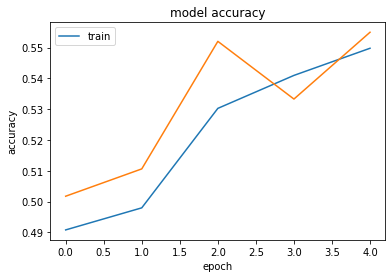

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

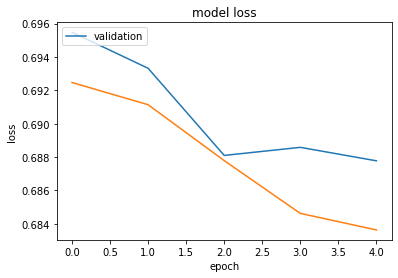

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.legend(['validation'], loc='upper left')
plt.show()

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [21]:
# Get list of layers from model
layer_outputs = [layer.output for layer in model.layers[1:]]

In [22]:
# Create a visualization model
visualize_model = tensorflow. keras. models.Model(inputs = model.input, outputs = layer_outputs)

In [24]:
# Load image for prediction
img=load_img('drive/My Drive/ex6_dataset/Training/dogs/Dog.01.jpg',target_size=(128, 128))

In [25]:
# Convert image to array 
x = img_to_array(img)

In [26]:
# Print shape of array
x.shape

(128, 128, 3)

In [27]:
# Reshape image for passing it to prediction 
x=x. reshape ( (1, 128, 128,3)) 
print (x.shape)

(1, 128, 128, 3)


In [28]:
# Rescale the image
x = x /255 

In [29]:
# Get all layers feature maps for image
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

1/1 [==============================] - 0s 150ms/step
10


In [30]:
# Show names of layers available in model
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten', 'dense', 'dense_1']


In [31]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 63, 63, 16)
(1, 61, 61, 32)
(1, 30, 30, 32)
(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 12, 12, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


(1, 6, 6, 8)
(1, 288)
(1, 512)
(1, 1)


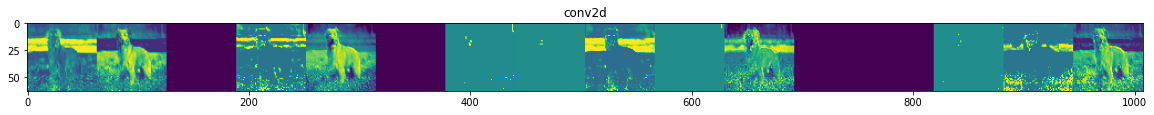

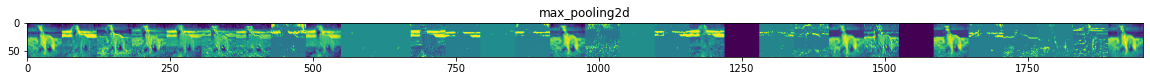

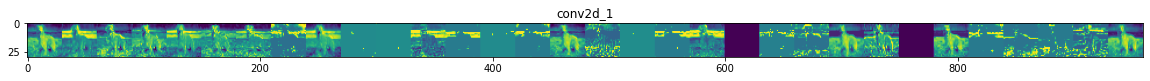

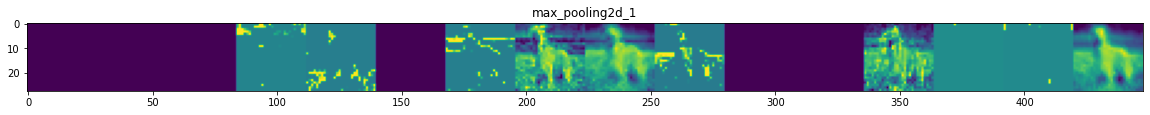

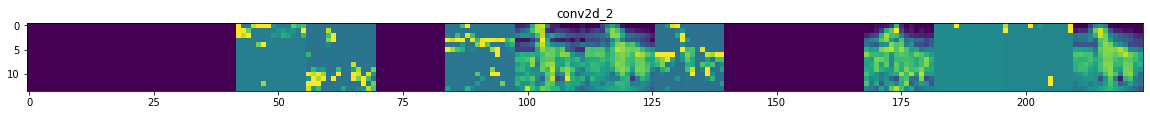

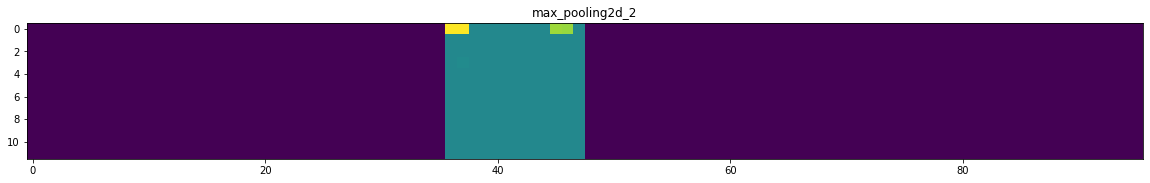

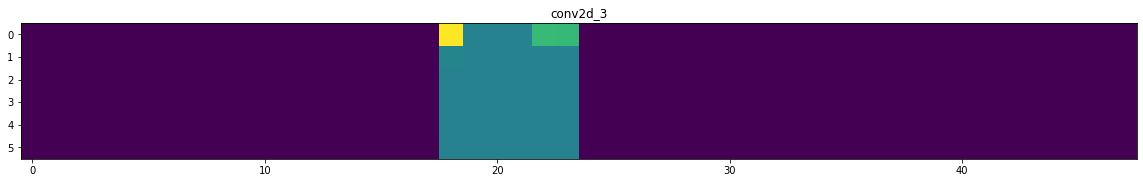

In [32]:
# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [33]:
filters = model.layers[2].get_weights()

In [34]:
print(filters)

[array([[[[-0.11072057, -0.0714577 , -0.09071527, ..., -0.07867631,
          -0.06328345, -0.08429941],
         [ 0.10110313, -0.02625535, -0.09174587, ..., -0.05626796,
           0.10386894,  0.07265667],
         [-0.04116235, -0.04144661,  0.01751738, ..., -0.05954206,
          -0.0296813 ,  0.07953478],
         ...,
         [ 0.03244279, -0.10547981,  0.06927541, ..., -0.07223745,
           0.09735812, -0.02518765],
         [-0.01100529, -0.06325395,  0.01254709, ..., -0.04127378,
           0.09842384,  0.08431406],
         [ 0.1009163 , -0.07953453,  0.04414141, ...,  0.07240322,
           0.06594648,  0.00464992]],

        [[-0.09500033,  0.1207481 , -0.09165658, ..., -0.03752775,
          -0.04013196, -0.01390429],
         [ 0.01032911, -0.10584342,  0.0140851 , ..., -0.0225711 ,
          -0.03081717,  0.03394663],
         [ 0.00593003, -0.06590729, -0.00654555, ...,  0.10113825,
          -0.03307643,  0.06002889],
         ...,
         [ 0.06773856,  0.0222786

conv2d
16


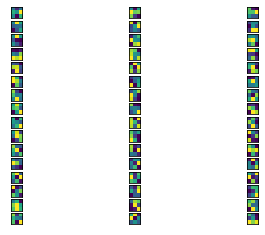

conv2d_1
32


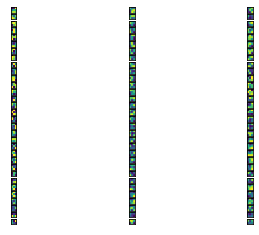

conv2d_2
16


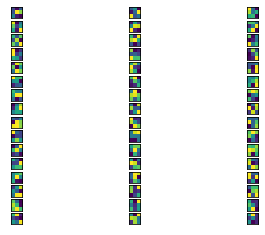

conv2d_3
8


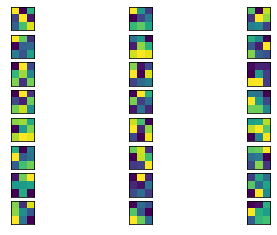

In [35]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()